# Assignment 2 - Dataset description

The questions below relate to the data files associated with the contest with the title "Beijing Multi-Site Air Quality Data" published at the following website. https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

Problem description:

Your goal is to predict the PM 2.5 levels in the air to determine the Air quality of Beijing. There are multiple datasets concerning different districts in Beijing. The data was recorded hourly for each district.Throughout, missing values have been filled as NaNs.

Dataset Description: This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

Assignment:

The goal is achieved through three subsequent Assignments 1, and 2 all using the same dataset

The features in this dataset are provided as following

No: row number year: year of data in this row month: month of data in this row day: day of data in this row hour: hour of data in this row PM2.5: PM2.5 concentration (ug/m^3) PM10: PM10 concentration (ug/m^3) SO2: SO2 concentration (ug/m^3) NO2: NO2 concentration (ug/m^3) CO: CO concentration (ug/m^3) O3: O3 concentration (ug/m^3) TEMP: temperature (degree Celsius) PRES: pressure (hPa) DEWP: dew point temperature (degree Celsius) RAIN: precipitation (mm) wd: wind direction WSPM: wind speed (m/s) station: name of the air-quality monitoring site

(Where appropriate, units are provided as a _unit suffix on the feature name.)



# Assignment 2 Questions

Use the merged data frame from Assignment 1 for this assignment. This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 (or reload with same steps and create merged data frame). You will be predicting PM2.5 levels using a machine learning model in this assignment.  

1. Take a subset of the dataset(10%-15% of the dataset(because hyper-parameter search will take more time to compute)) for modelling. Please do the following using the same subset.

•	Import the required libraries

.   Remove variables if you find multicollinearity between independent variables.

.   Reindex the columns such that target variable(PM2.5) should be at the last in the column index.

•	Make an 80-20 stratified split based on the target data

•	Preprocess the data (Encode the categorical features and Standardize the numerical features) of merged dataset


•	Build a stochastic gradient descent regressor, train the model

•	Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

•	List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 



- Optional(no extra credit): Try predicting the target variable with SVM regressor or any other ML model and show the improvement.




# Submit the following for this assignment:

.ipynb and .html formats of Jupyter notebook code with outputs. Please follow the coding standards.(can loose marks on this, if it is not done properly)

**Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

**Preprocessing the data**

In [2]:
df1 = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
df3 = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
df5 = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
df6 = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
df8 = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [3]:
frames = [df1, df2, df3,df4, df5, df6,df7, df8, df9,df10,df11, df12]
data = pd.concat(frames)

In [4]:
data.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

**Taking 10% subset of the dataset**

In [5]:
data = data.sample(frac =.10)

In [6]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
28832,28833,2016,6,14,8,48.0,48.0,2.0,35.0,600.0,66.0,19.9,994.3,17.1,0.0,NE,1.5,Nongzhanguan
13006,13007,2014,8,24,22,41.0,60.0,2.0,33.0,900.0,114.0,24.3,1005.9,17.5,0.0,SSE,0.8,Nongzhanguan
15546,15547,2014,12,8,18,87.0,112.0,31.0,74.0,1600.0,22.0,1.0,1032.0,-13.1,0.0,S,1.0,Tiantan
26338,26339,2016,3,2,10,201.0,212.0,46.0,96.0,2600.0,22.0,8.2,1010.2,-8.4,0.0,ENE,1.5,Gucheng
27823,27824,2016,5,3,7,14.0,14.0,3.0,52.0,600.0,17.0,15.8,998.0,-0.5,0.0,NW,3.0,Guanyuan


**Dropping the null values from the dataset**

In [7]:
data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       883
PM10        630
SO2         905
NO2        1176
CO         2044
O3         1271
TEMP         39
PRES         39
DEWP         39
RAIN         40
wd          200
WSPM         34
station       0
dtype: int64

In [8]:
data.dropna(subset = ['PM2.5'], inplace = True)
data.isnull().sum()/data.count()
data = data.dropna()

**Renaming the column names**

In [9]:
data=data.rename(columns ={'wd':'wind_direction','DEWP':'dew_point_temp','TEMP':'temp','RAIN':'rain','WSPM':'wind_speed','PRES':'pressure'})

**Removing the variables which are multicollinear**

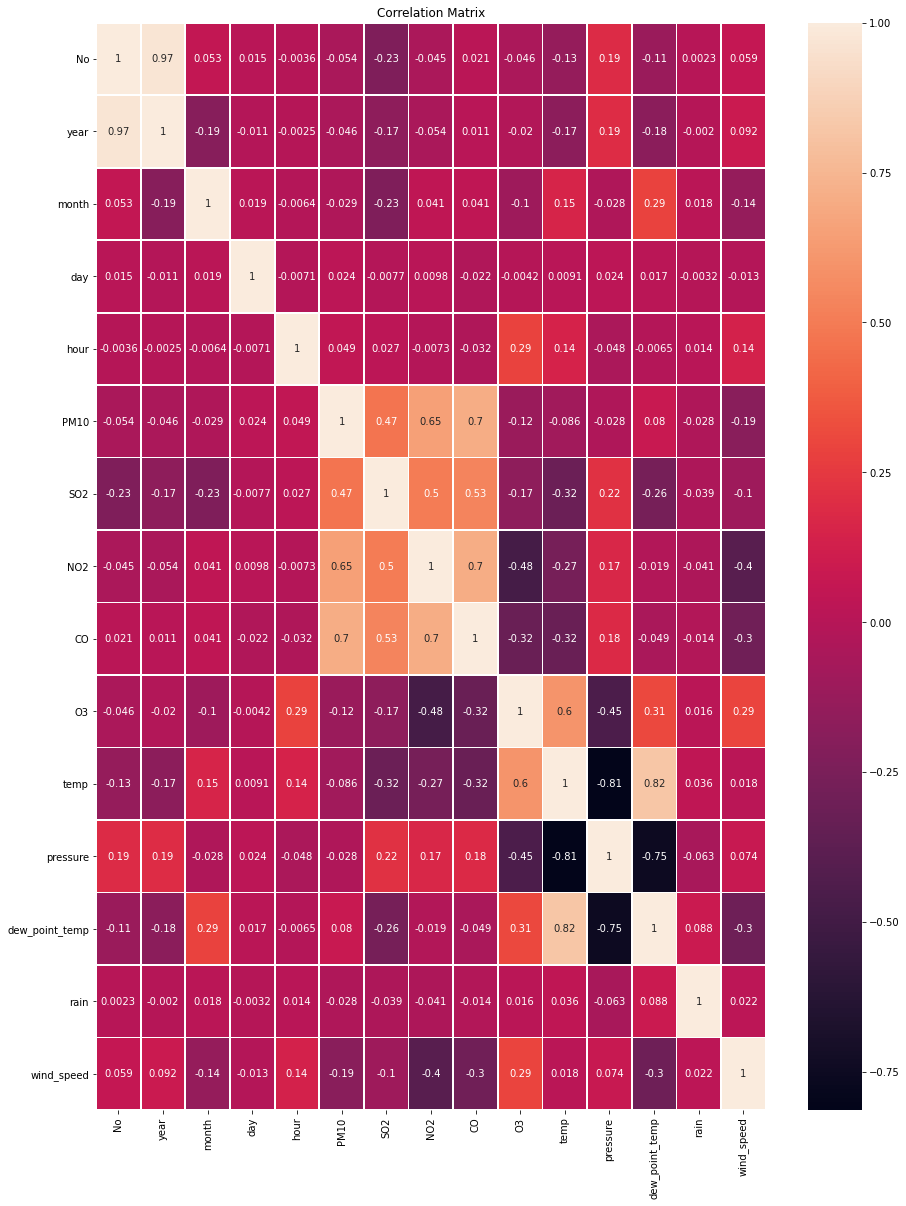

In [10]:
plt.figure(figsize=(15, 20))
plt.title('Correlation Matrix')
sns.heatmap(data.iloc[:,data.columns != 'PM2.5'].corr(), annot=True, linewidth = 0.75)
plt.show()

In [11]:
data=data.drop(['No','pressure','temp'],axis=1)

Pressure and temp are highly correlated with dew_point_temp variable, removing both variables.Also removing NO variable as it adding no value to the dataset.

**Removing Outliers**

In [12]:
Q1=data['PM2.5'].quantile(0.25)
Q3=data['PM2.5'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
data=data[~((data['PM2.5']<(Q1-1.5*IQR))|(data['PM2.5']>(Q3+1.5*IQR)))]
data.shape

90.0


(36441, 15)

**Reindexing Columns**

In [13]:
data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'dew_point_temp', 'rain', 'wind_direction', 'wind_speed',
       'station'],
      dtype='object')

In [14]:
data = data.reindex(columns = ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'dew_point_temp', 'rain', 'wind_direction', 'wind_speed',
       'station', 'PM2.5'])

**Making an 80-20 stratified split based on the target data**

In [15]:
X = data.drop('PM2.5', axis = 1)
Y = data['PM2.5']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state=42, stratify=data['station'])

In [17]:
X_train['station'].value_counts()

Tiantan          2591
Changping        2560
Guanyuan         2482
Huairou          2466
Wanshouxigong    2458
Nongzhanguan     2450
Dingling         2435
Gucheng          2396
Aotizhongxin     2384
Shunyi           2335
Dongsi           2306
Wanliu           2289
Name: station, dtype: int64

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(29152, 14)
(7289, 14)
(29152,)
(7289,)


In [19]:
X_train.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,dew_point_temp,rain,wind_direction,wind_speed,station
2161,2013,5,30,1,143.0,17.0,80.0,600.0,12.0,7.6,0.0,WSW,0.0,Tiantan
31356,2016,9,27,12,20.0,2.0,8.0,400.0,63.0,1.9,0.0,NE,5.9,Nongzhanguan
1657,2013,5,9,1,39.0,13.0,29.0,700.0,39.0,11.6,0.0,WSW,0.0,Wanshouxigong
28368,2016,5,26,0,72.0,4.0,73.0,800.0,2.0,8.4,0.0,E,0.9,Aotizhongxin
12041,2014,7,15,17,87.0,10.0,9.0,600.0,219.0,17.9,0.0,S,3.3,Tiantan


**Encoding the categorical features**

In [20]:
X_train.month = X_train.month.astype('category')
X_train.hour = X_train.hour.astype('category')
X_train.day = X_train.day.astype('category')
X_train.wind_direction = X_train.wind_direction.astype('category')
X_train.station = X_train.station.astype('category')
X_test.month = X_test.month.astype('category')
X_test.hour = X_test.hour.astype('category')
X_test.day = X_test.day.astype('category')
X_test.wind_direction = X_test.wind_direction.astype('category')
X_test.station = X_test.station.astype('category')

/Users/krishnajyesta/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
X_train.head()

,year,PM10,SO2,NO2,CO,O3,dew_point_temp,rain,wind_speed,month_1,...,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
2161,2013,143.0,17.0,80.0,600.0,12.0,7.6,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
31356,2016,20.0,2.0,8.0,400.0,63.0,1.9,0.0,5.9,0,...,0,0,0,0,0,1,0,0,0,0
1657,2013,39.0,13.0,29.0,700.0,39.0,11.6,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
28368,2016,72.0,4.0,73.0,800.0,2.0,8.4,0.0,0.9,0,...,0,0,0,0,0,0,0,0,0,0
12041,2014,87.0,10.0,9.0,600.0,219.0,17.9,0.0,3.3,0,...,0,0,0,0,0,0,0,1,0,0


**Standardizing the numerical features**

In [22]:
nums_cols=['year', 'PM10', 'SO2', 'NO2', 'CO','O3', 'dew_point_temp', 'rain', 'wind_speed']

In [23]:
for i in nums_cols:
  scaler=StandardScaler().fit(X_train[[i]])
  X_train[i]=scaler.transform(X_train[[i]])
  X_test[i]=scaler.transform(X_test[[i]])

In [24]:
X_train.head()

,year,PM10,SO2,NO2,CO,O3,dew_point_temp,rain,wind_speed,month_1,...,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
2161,-1.466944,0.696389,0.146308,1.053469,-0.548685,-0.836070,0.356339,-0.082572,-1.391812,0,...,0,0,0,0,0,0,0,1,0,0
31356,1.110049,-0.999032,-0.644206,-1.260543,-0.775022,0.067667,-0.050276,-0.082572,3.254508,0,...,0,0,0,0,0,1,0,0,0,0
1657,-1.466944,-0.737137,-0.064496,-0.585623,-0.435516,-0.357621,0.641683,-0.082572,-1.391812,0,...,0,0,0,0,0,0,0,0,0,1
28368,1.110049,-0.282268,-0.538804,0.828496,-0.322347,-1.013273,0.413408,-0.082572,-0.683052,0,...,0,0,0,0,0,0,0,0,0,0
12041,-0.607946,-0.075510,-0.222598,-1.228404,-0.548685,2.832040,1.091100,-0.082572,1.206977,0,...,0,0,0,0,0,0,0,1,0,0


**Building a stochastic gradient descent regressor**

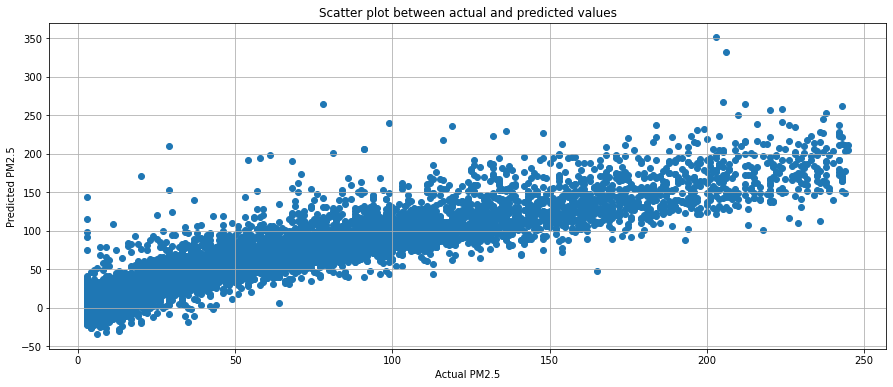

In [25]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, Y_train)
plt.figure(figsize=(15,6))
plt.scatter(Y_test,sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Scatter plot between actual and predicted values')
plt.show()

**Evaluating your model using applicable metrics.**

In [26]:
print('Mean Squared Error :', mean_squared_error(Y_test, sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, sgd.predict(X_test)))
print('Root Mean Square Error :',mean_squared_error(Y_test, sgd.predict(X_test), squared=False))
print ('R2 Score:', r2_score(Y_test,sgd.predict(X_test)))

Mean Squared Error : 610.8793736774384
Mean Absolute Error : 17.774462684960298
Root Mean Square Error : 24.715974058843774
R2 Score: 0.8173645711436324


For regression problems, RMSE,MSE & MAE are popular metrics.
- RMSE is the most popular evaluation metric used in regression problems.In RMSE, ‘square root’ of the error helps to show large number deviations for large errors. 
- MAE: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
- R2 Score - R2 score(coefficient of determination) is the amount of the variation/correlation in the target variable which is predictable from the input independent variables.R2 score value ranges from 0 to 1,which can be easily interpreted.


**Hyperparameters that can be tuned in SGD**

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001,0.0005,0.00005], #Constant that multiplies the regularization term. Defaults to 0.0001
    'learning_rate': ['constant', 'optimal', 'invscaling'], 
    'loss' : ['squared_loss', 'huber'],#loss function to be used
    'eta0':[0.001,0.01,0.05,0.1],#The initial learning rate
    'max_iter': [2000] #number of passes over the training data
}
Grid = GridSearchCV(sgd, param_grid)
x=Grid.fit(X_train, Y_train)
print(x)

/Users/krishnajyesta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/krishnajyesta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/krishnajyesta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/krishnajyesta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_g

GridSearchCV(estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [0.0001, 0.0005, 5e-05],
                         'eta0': [0.001, 0.01, 0.05, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber'],
                         'max_iter': [2000]})


In [28]:
x.best_score_
x.best_params_ # Gives us the best parameters which needs to be tuned with the correct values

{'alpha': 5e-05,
 'eta0': 0.001,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 2000}

**Tuning the parameters in the sgd model**

In [29]:
finalsgd=SGDRegressor(alpha=0.00005,eta0=0.001,learning_rate='invscaling',loss='squared_loss',max_iter=2000)
finalsgd.fit(X_train, Y_train)
Y_pred=finalsgd.predict(X_test)
print('Mean Squared Error :', mean_squared_error(Y_test, Y_pred))
print('Mean Absolute Error :',mean_absolute_error(Y_test, Y_pred))
print('Root Mean Square Error :',mean_squared_error(Y_test, Y_pred, squared=False))
print ('R2 Score:', r2_score(Y_test,Y_pred))

Mean Squared Error : 611.4152886219321
Mean Absolute Error : 17.70454084948974
Root Mean Square Error : 24.72681315135317
R2 Score: 0.8172043479311035


After tuning the parameters, we can see that there is very little improvement in accuracy.